# Sample ldcpy Notebook

In [1]:
# Add ldcpy root to system path
import sys
sys.path.insert(0,'../../../')

import ldcpy
# Import ldcpy package
# Autoreloads package everytime the package is called, so changes to code will be reflected in the notebook if the above sys.path.insert(...) line is uncommented.
%load_ext autoreload
%autoreload 2
import ldcpy.plot as lp

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading Datasets and Viewing Metadata

We use three different datasets in these examples, one containing TS data (ds), one containing PRECT data (ds2), and a 3d dataset containing T data (ds3). These datasets are ensembles of variable data in several different netCDF files, which are given ensemble names in the second parameter to the ldcpy.open_datasets function.

In [3]:
# ds contains TS data
ds = ldcpy.open_datasets(['../../../data/cam-fv/orig.TS.100days.nc', '../../../data/cam-fv/zfp1.0.TS.100days.nc', '../../../data/cam-fv/zfp1e-1.TS.100days.nc'],
                         ['orig', 'zfpA1.0', 'zfpA1e-1'])
ds2 = ldcpy.open_datasets(['../../../data/cam-fv/orig.PRECT.100days.nc', '../../../data/cam-fv/zfp1e-7.PRECT.100days.nc', '../../../data/cam-fv/zfp1e-11.PRECT.100days.nc'],
                         ['orig', 'zfpA1.0', 'zfpA1e-1'])
ds3 = ldcpy.open_datasets(['../../../data/cam-fv/cam-fv.T.6months.nc'], ['orig'])

The print_stats function can be used to gather overall statistics on two (original and reconstructed) datasets and the error between the datasets:

In [4]:
ldcpy.print_stats(ds, 'TS', 'orig', 'zfpA1.0')

Comparing orig data to zfpA1.0 data
{
    "max_error": 0.4058837890625,
    "mean_modelled": 274.707935474537,
    "standard_deviation_observed": 23.10856581306422,
    "mean_error": 0.00576729244656033,
    "covariance": 533.8405046664303,
    "mean_squared_error": 0.005666020999224538,
    "standard_deviation_modelled": 23.10856581306422,
    "ks_p_value": [
        0.9999947706571545,
        0.0
    ],
    "mean_observed": 274.7137027669836,
    "root_mean_squared_error": 0.07527297655350516,
    "variance_observed": 533.680828155477,
    "variance_modelled": 533.680828155477,
    "mean_absolute_error": 0.05852021166571864,
    "pearson_correlation_coefficient": 0.9999947706571547,
    "min_error": -0.361724853515625
}


Printing a dataset reveals the dimension names, sizes, datatypes and initial values, among other metadata:

In [5]:
ds

<xarray.Dataset>
Dimensions:    (ensemble: 3, ilev: 31, lat: 192, lev: 30, lon: 288, nbnd: 2, time: 100)
Coordinates:
  * ilev       (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lev        (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * time       (time) object 1920-01-01 00:00:00 ... 1920-04-10 00:00:00
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * ensemble   (ensemble) <U8 'orig' 'zfpA1.0' 'zfpA1e-1'
Dimensions without coordinates: nbnd
Data variables:
    P0         float64 1e+05
    time_bnds  (time, nbnd) object 1920-01-01 00:00:00 ... 1920-04-10 00:00:00
    hyam       (lev) float64 0.003643 0.007595 0.01436 ... 0.006255 0.001989 0.0
    hybi       (ilev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9389 0.9636 0.9851 1.0
    hyai       (ilev) float64 0.002255 0.005032 0.01016 ... 0.003979 0.0 0.0
    hybm       (lev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9251 0.9512 0.9743 0.9926
    gw         (lat) float64 3.382e-05 0.0002705 ... 0.0002705 3.382e-05
    TS         (ensemble, time, lat, lon) float32 242.21022 ... 246.75244
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.B20TRC5CNBDRD.f09_g16.030
    title:            UNSET
    logname:          mai
    host:             ys0110
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Wed Oct 16 12:10:39 2019: ncks -d time,0,99,1 -v TS,gw,...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...

We can use the ldcpy.metrics.AggregateMetrics class to print the metric data if we do not want to plot it directly using the ldcpy.plot.plot function:

In [6]:
ds_metrics = ldcpy.metrics.AggregateMetrics(ds['TS'].sel(ensemble='orig'), ['time'])
ds_metrics.get_metric("mean")

<xarray.DataArray 'TS' (lat: 192, lon: 288)>
array([[228.94809, 229.39447, 229.4218 , ..., 229.3786 , 228.95282,
        229.44504],
       [229.33379, 229.38763, 229.32793, ..., 228.73062, 229.06294,
        229.02658],
       [229.7412 , 229.81758, 229.76837, ..., 229.55832, 229.75507,
        229.57973],
       ...,
       [237.00484, 237.03712, 237.06767, ..., 236.91641, 236.94582,
        236.9735 ],
       [236.69006, 236.70526, 236.72083, ..., 236.639  , 236.65666,
        236.67387],
       [236.29597, 236.29749, 236.29877, ..., 236.29068, 236.29262,
        236.29439]], dtype=float32)
Coordinates:
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    ensemble  <U8 'orig'

## Spatial Plots

The most basic usage of the ldcpy.plot.plot() function requires a dataset, the variable of interest, the ensemble name of the original data, and the metric of interest. By default, a spatial plot of this data is created.

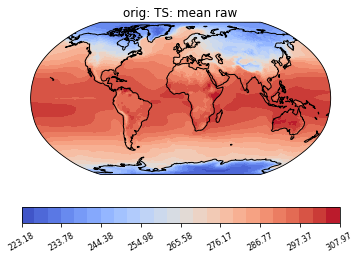

In [7]:
lp.plot(ds, "TS", 'orig', 'mean')

If we want a side-by-side comparison of two datasets, we need to specify an additional dataset using the ens_r argument, and a non-default plot_type:

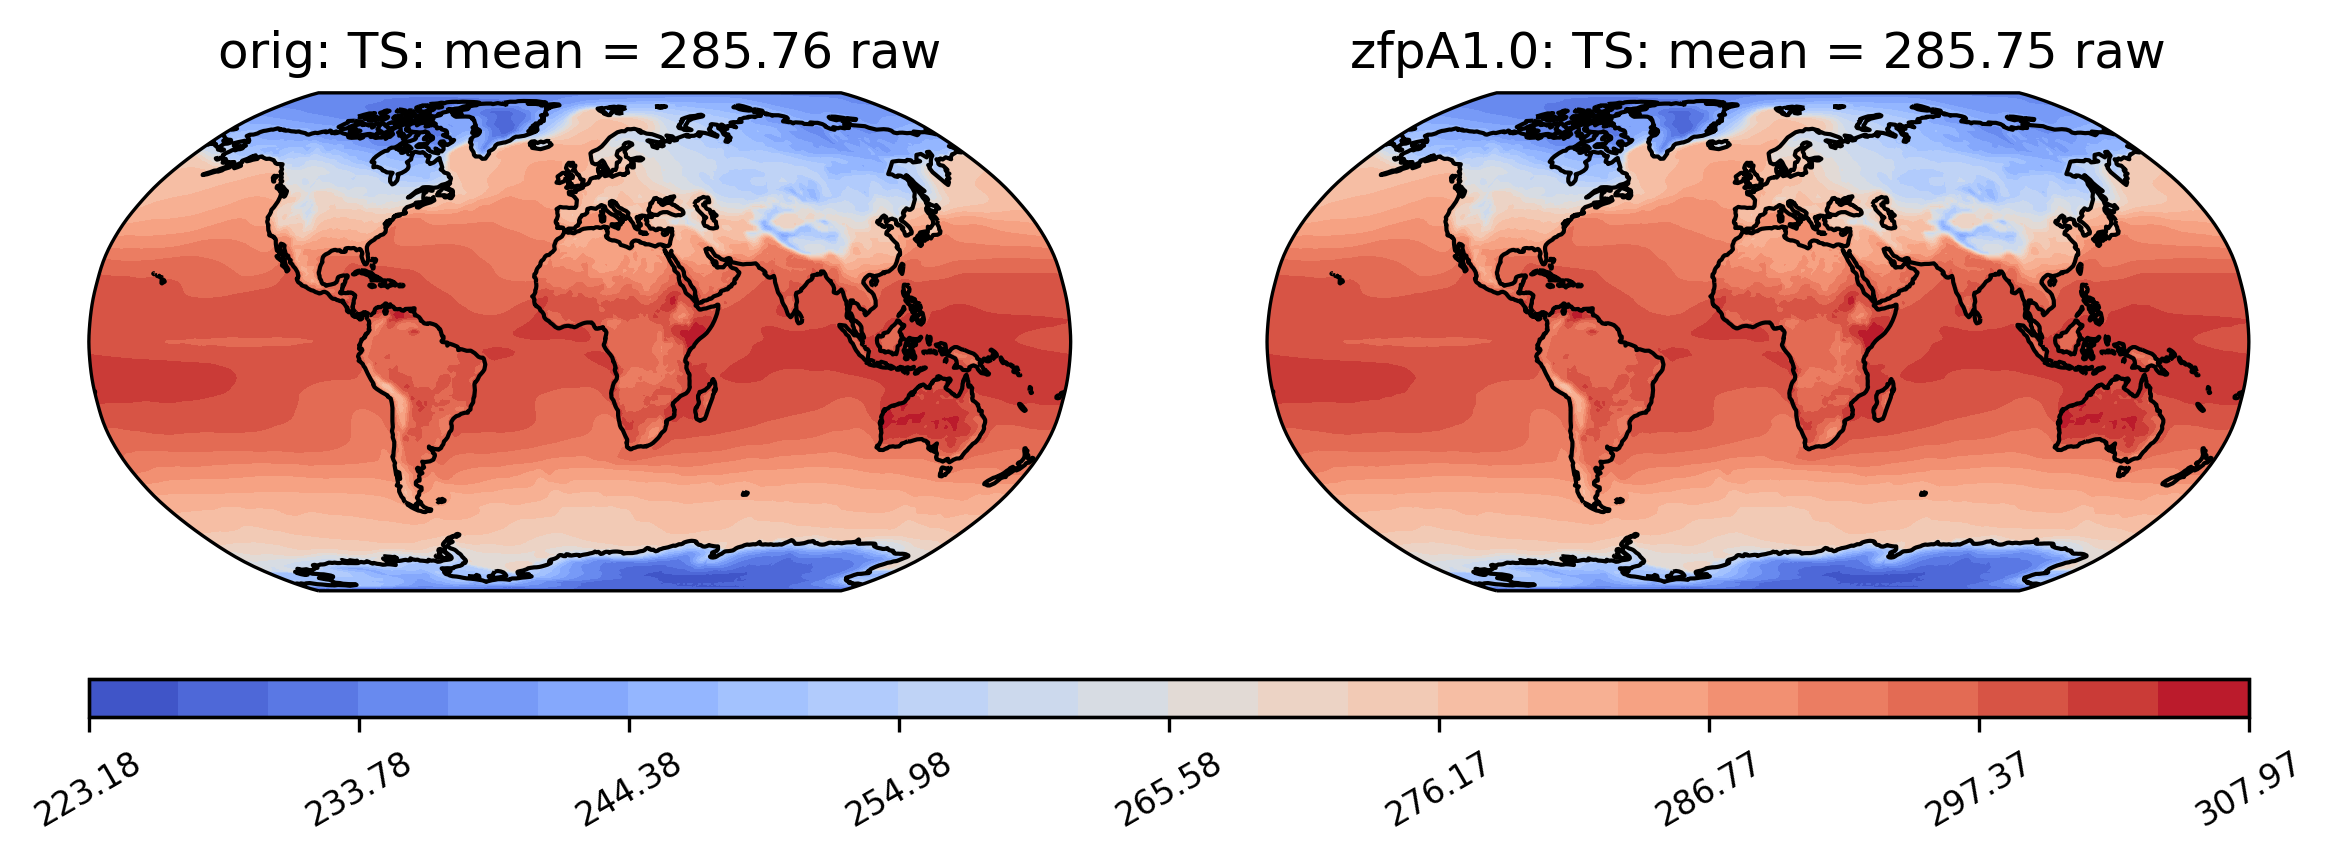

In [8]:
lp.plot(ds, "TS", 'orig', 'mean', ens_r='zfpA1.0', plot_type="spatial_comparison")

It is possible to compare two compressed datasets side by side as well, by simply using a different first ensemble name:

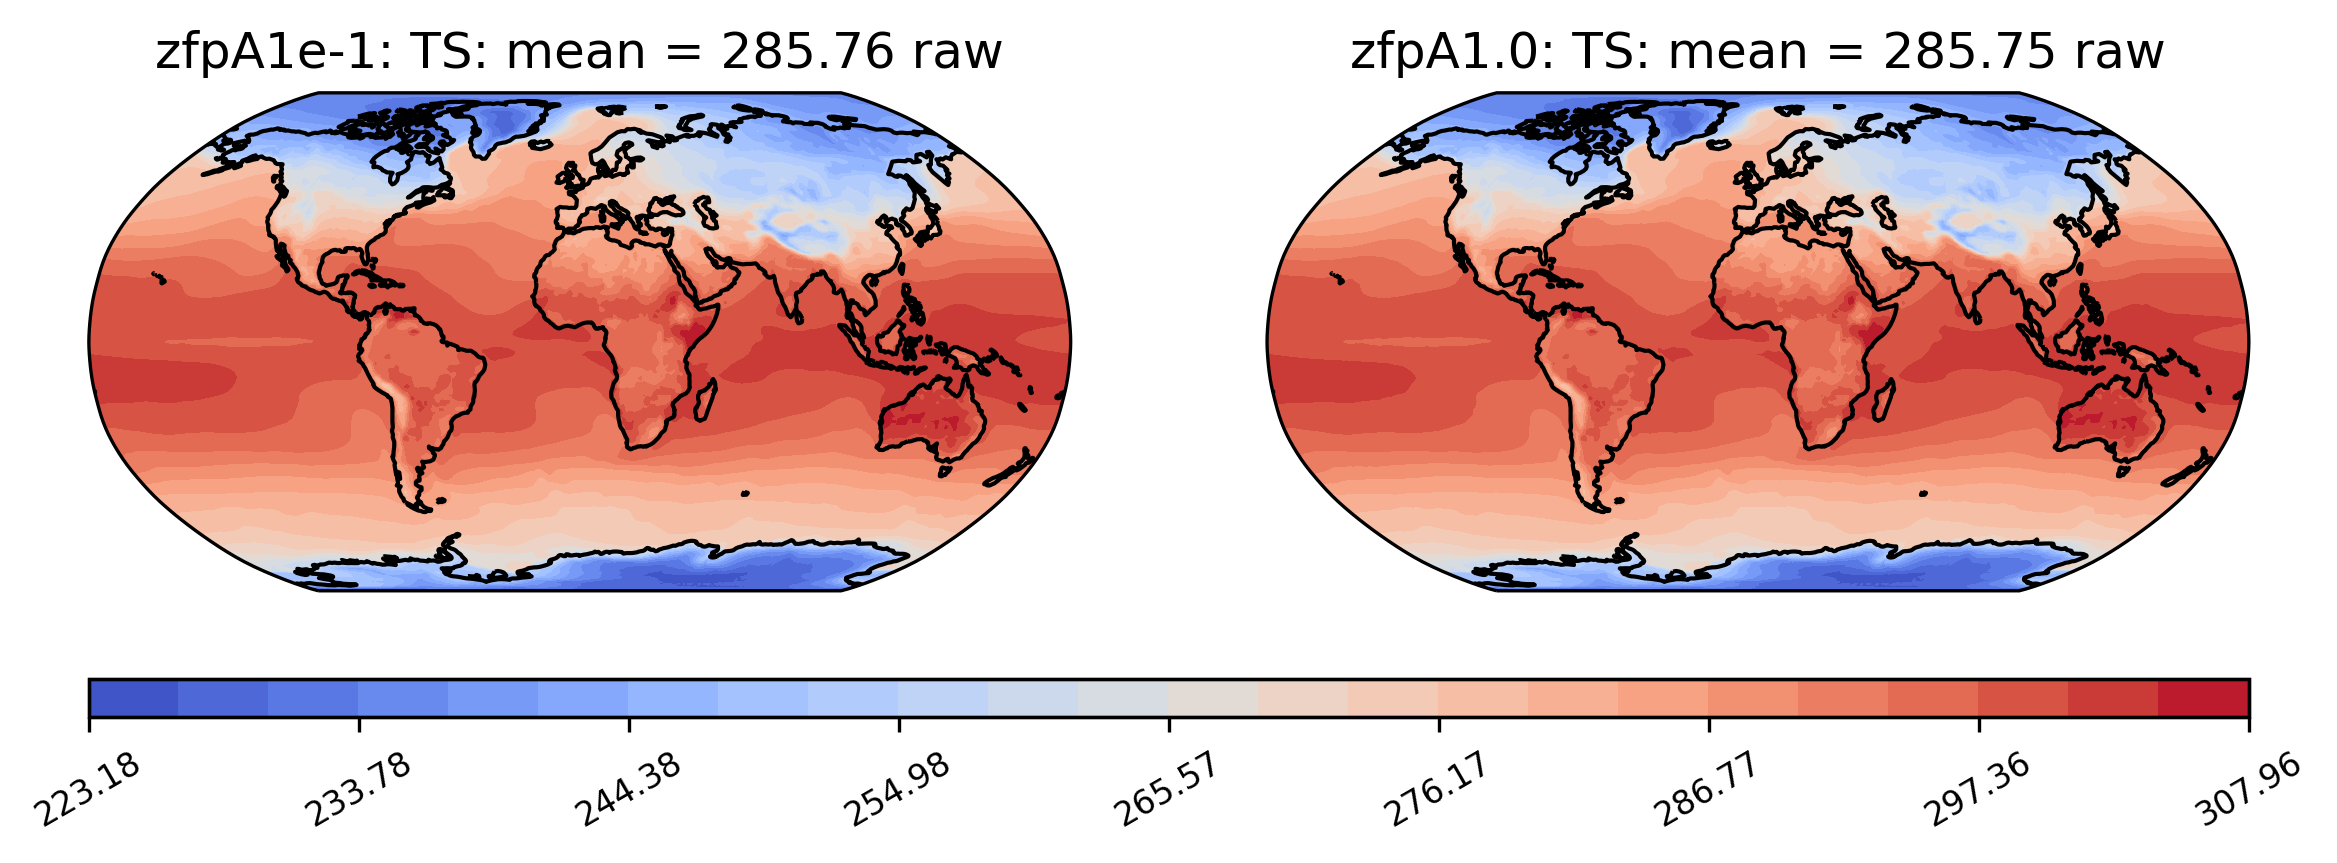

In [9]:
lp.plot(ds, "TS", 'zfpA1e-1', 'mean', ens_r='zfpA1.0', plot_type="spatial_comparison")

We can also plot different metrics, such as the mean standard deviation at each point, or change the color scheme (for a full list of metrics and color schemes, see the documentation):

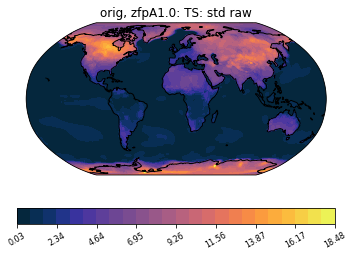

In [10]:
lp.plot(ds, "TS", 'orig', 'std', ens_r='zfpA1.0', color="cmo.thermal")

Some metrics result in values that are +/- infinity, or NaN (likely resulting from operations like 0/0 or inf/inf). NaN values are plotted in gray, infinity is plotted in white, and negative infinity is plotted in black (regardless of color scheme). If infinite values are present in the plot data, arrows on either side of the colorbar are shown to indicate the color for +/- infinity:

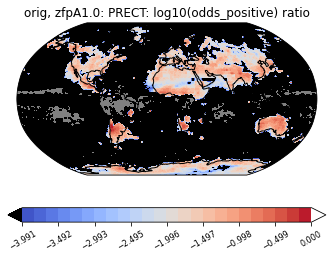

In [11]:
lp.plot(ds2, 'PRECT', 'orig', ens_r='zfpA1.0', metric='odds_positive', metric_type="ratio", transform="log")

If all values are NaN, the colorbar is not shown but instead a legend is shown indicating the gray color of NaN values, and the whole plot is colored gray. (If all values are infinite, the plot is displayed normally with all values either black or white):

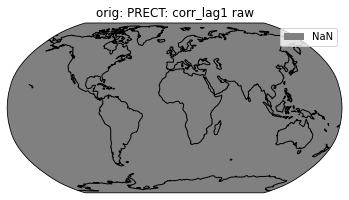

In [12]:
lp.plot(ds2, "PRECT", "orig", metric="corr_lag1")

Additionally, there are a number of ways to compare datasets besides a side-by-side comparison. By specifying the metric_type, we can plot the diff or the ratio between the metrics in two datasets:

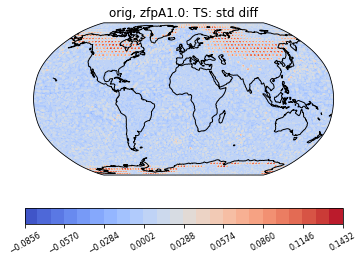

In [13]:
lp.plot(ds, 'TS', 'orig', ens_r='zfpA1.0', metric="std", metric_type="diff")

Sometimes, we may want to compute a metric on the difference between the datasets. For instance, the zscore metric calculates the zscore at each point under the null hypothesis that the true mean is zero, so using the "metric_of_diff" metric_type calculates the zscore of the diff between two datasets (to find the values that are significantly different between the two datasets). The zscore metric in particular gives additional information about the percentage of significant gridpoints in the plot title:

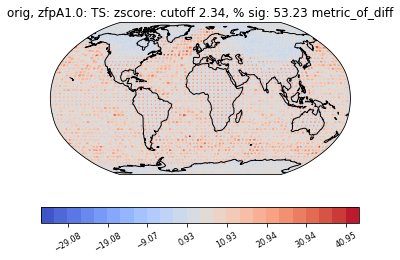

In [14]:
lp.plot(ds, 'TS', 'orig', 'zscore', ens_r="zfpA1.0", metric_type="metric_of_diff")

Plotting the metric of a subset of the data is possible using the subset keyword:

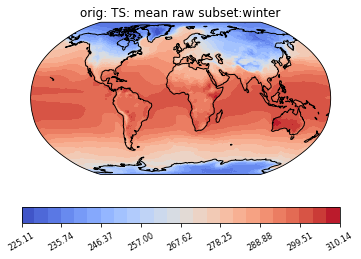

In [15]:
lp.plot(ds, "TS", 'orig', 'mean', subset="winter")

Finally, a single time slice of a 3d dataset can be plotted using the lev keyword, which selects the nearest level to the lev value specified (by default, lev=0):

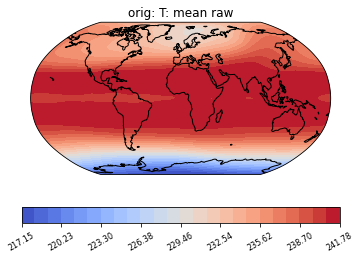

In [16]:
lp.plot(ds3, "T", 'orig', 'mean', lev='300')

## Time-Series Plots

We may also plot a time-series plot of the metrics by changing the plot_type, which calculate the mean metric value across space rather than across time:

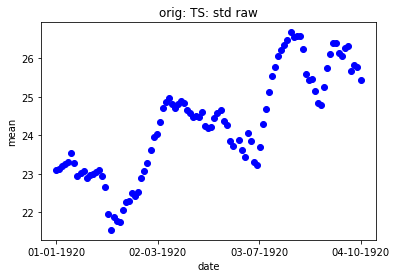

In [17]:
lp.plot(ds, "TS", 'orig', 'std', plot_type="time_series")

To group the data by time, use the group_by keyword:

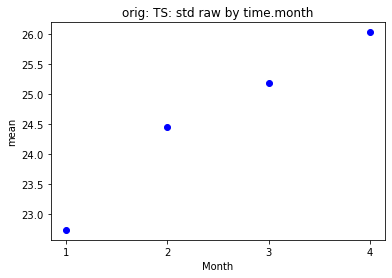

In [18]:
lp.plot(ds, "TS", 'orig', 'std', plot_type="time_series", group_by="time.month")

We can view a histogram of the time-series data by changing the plot_type to histogram:

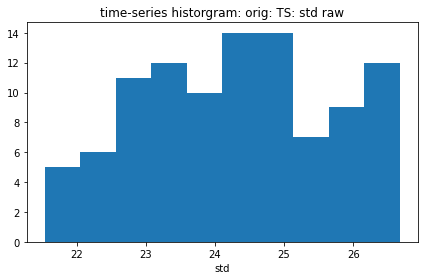

In [26]:
lp.plot(ds, "TS", 'orig', 'std', plot_type="histogram")

A second dataset can be specified using the ens_r keyword, just as in the spatial plots. The metric_type keyword can also be used in the same way:

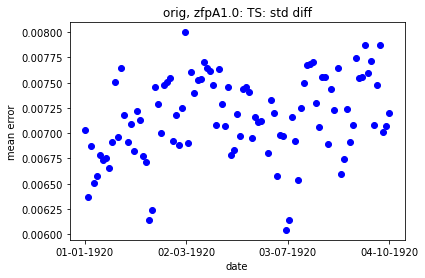

In [20]:
lp.plot(ds, "TS", 'orig', 'std', plot_type="time_series", ens_r="zfpA1.0", metric_type="diff")

Subsetting is also possible on time-series data:

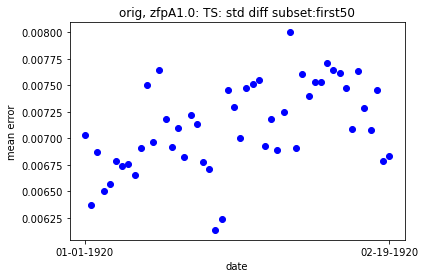

In [21]:
lp.plot(ds, "TS", 'orig', 'std', plot_type="time_series", ens_r="zfpA1.0", metric_type="diff", subset="first50")

Additionally, we can specify lat and lon keywords for time-series plots that give us a subset of the data at a single point, rather than averaging over all latitudes and longitudes. The nearest latitude and longitude point to the one specified is plotted (and the actual coordinates of the point can be found in the plot title):

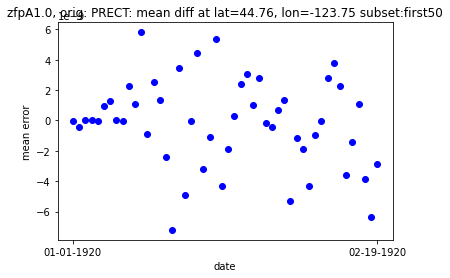

In [27]:
lp.plot(ds2, "PRECT", 'zfpA1.0', ens_r='orig', metric_type="diff", metric="mean", plot_type="time_series", subset="first50", lat=44.56, lon=-123.26)
